# Setup

In [ ]:
# Mount Google Drive.
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
random.seed(1)
import re

# Set working directory.
os.chdir('/content/gdrive/My Drive/personal/CS224U/project')
# os.listdir() # Uncomment to sanity check that you're in the right directory.

['Data exploration.ipynb',
 'Project brainstorm.gdoc',
 'AI creativity judge (Science Style 0502).docx',
 'CS224U Lit Review.gdoc',
 'Notes - creativity.gdoc',
 'Copy of AI Creativity- Interpretable Model (CS224U).ipynb',
 'CS224U_lit_review.pdf',
 'Copy of “AI Creativity- DistilBERT Regression (CS224U).ipynb',
 'Idea Ratings_Berg_2019_OBHDP.xlsx',
 'CS224u experiment protocol draft.gdoc']

# Word count and score distributions

In [ ]:
# Takes a dataframe and adds a 'wordcount' column (modifies original df)
# Requirement: df has existing 'text' column
# Returns modified df with 'wordcount' column added
def add_wordcount_col(df):
  assert 'text' in df
  df['wordcount'] = df['text'].str.split().str.len()

In [ ]:
# Takes a dataframe and returns a new dataframe containing only rows where wordcount < max_words
# Requirement: input df has existing 'wordcount' column
def restrict_by_wordcount(df, max_words):
  assert 'wordcount' in df
  df_restricted = df.loc[df['wordcount'] <= max_words]
  return df_restricted

summary statistics for word distribution in study 1:
         wordcount
count   300.000000
min       9.000000
max     394.000000
mean     99.956667
median   86.000000
std      67.335690


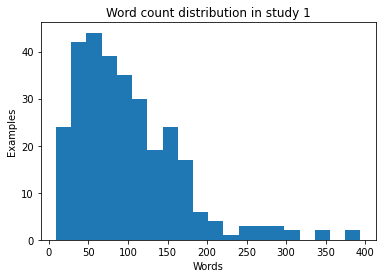

summary statistics for word distribution in study 2:
         wordcount
count   584.000000
min       7.000000
max     367.000000
mean    104.779110
median   93.000000
std      67.315194


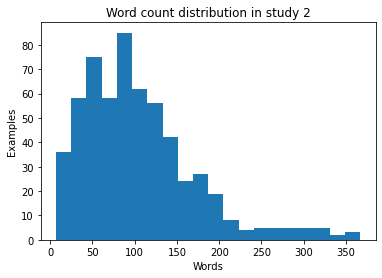

summary statistics for word distribution in study 3:
         wordcount
count   308.000000
min      12.000000
max     391.000000
mean    155.269481
median  139.500000
std      80.637457


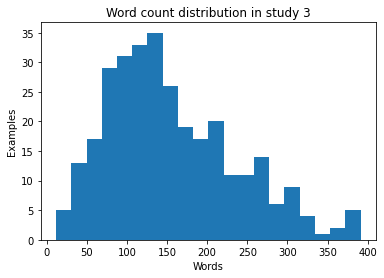

In [ ]:
# Distribution of word counts in each study, with max_words=MAX_WORDS.
# The max wordcount across all studies is 663, so the default value of 700
# will give the distribution for the entire dataset.
# Caveat: this word count is not exact, since there are / / symbols in the text.
def wordcount_statistics(max_words=700):
  for study in range(1,4):
    sheet = pd.read_excel("Idea Ratings_Berg_2019_OBHDP.xlsx", sheet_name= study-1)
    sheet.dropna(inplace=True) # For some reason, first sheet has an extra NaN row at the bottom. This makes sure it's removed.
    df_text = sheet[["Final_Idea"]].rename(columns={'Final_Idea': 'text'})

    add_wordcount_col(df_text)
    df_text = restrict_by_wordcount(df_text, max_words)
    print('summary statistics for word distribution in study %d:' %study)
    print(df_text.agg({'wordcount': ['count', 'min', 'max', 'mean', 'median', 'std']}))
    _ = plt.hist(df_text['wordcount'], bins=20)
    plt.title('Word count distribution in study %d' %study)
    plt.ylabel('Examples')
    plt.xlabel('Words')
    plt.show()

wordcount_statistics(max_words=400)

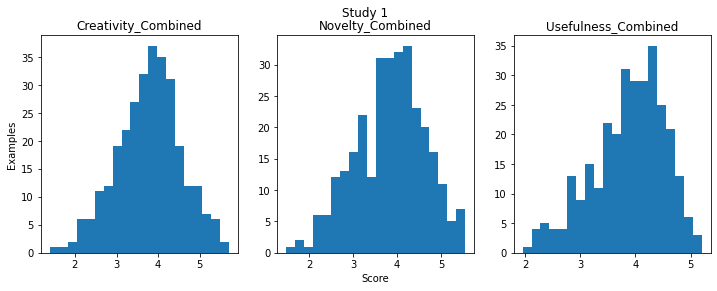

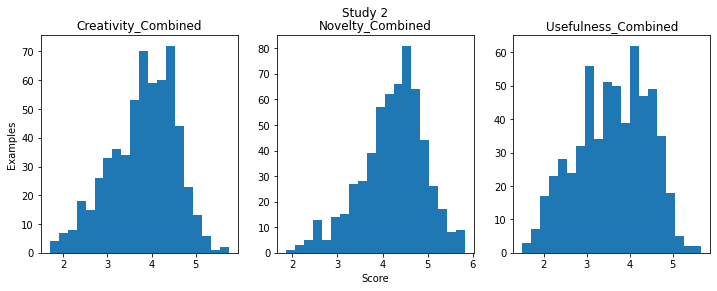

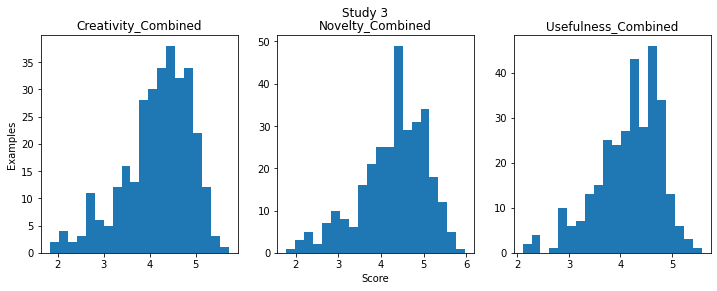

In [ ]:
# Distribution of scores in each study for each metric.
# Only plotted for samples with max MAX_WORDS word count.
def score_statistics(max_words=700):
  metrics = ["Creativity_Combined", "Novelty_Combined", "Usefulness_Combined"]
  for study in range(1,4):
    sheet = pd.read_excel("Idea Ratings_Berg_2019_OBHDP.xlsx", sheet_name= study-1)
    sheet.dropna(inplace=True)
    sheet = sheet.rename(columns={'Final_Idea': 'text'})

    add_wordcount_col(sheet)
    sheet = restrict_by_wordcount(sheet, max_words)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle('Study {}'.format(study))
    axs[0].set_ylabel('Examples')
    axs[1].set_xlabel('Score')
    for i in range(len(metrics)):
      metric = metrics[i]
      df_metric = sheet[['text', metric]].rename(columns={metric: 'score'})
      _ = axs[i].hist(df_metric['score'], bins=20)
      axs[i].set_title(metric)
    plt.show()

score_statistics(400)

In [ ]:
# 